# Práctica 7 - Gráficos
- Martínez Ostoa Néstor Iván
- Visualización de la Información
- Abril 2021

## Lectura y limpieza de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches

In [2]:
df = pd.read_excel('Canada.xls', sheet_name='Canada by Citizenship (2)')
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
df.isnull().sum().sum()

0

In [4]:
df = df.drop(columns=['AREA', 'REG', 'DEV', 'Type', 'Coverage'])
df = df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region', 'DevName':'Development'})
df = df.astype({'Country':'str', 'Continent':'str', 'Region':'str', 'Development':'str'})
df = df.set_index('Country')
df['Total'] = df.iloc[:, 3:].agg('sum', axis=1)
df.head()

,Continent,Region,Development,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## Pie Charts

In [5]:
continent_df = df.groupby(['Continent']).sum()
continent_df = continent_df.drop('World')
continent_df

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


In [6]:
temp_df = continent_df.reset_index(drop=True)
temp_df['Continent'] = continent_df.index
temp_df

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2006,2007,2008,2009,2010,2011,2012,2013,Total,Continent
0,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,29188,28284,29890,34534,40892,35441,38083,38543,618948,Africa
1,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,149054,133459,139894,141434,163845,146894,152218,155075,3317794,Asia
2,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,33053,33495,34692,35078,33425,26778,29177,28691,1410947,Europe
3,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24676,26011,26547,26867,28818,27856,27173,24950,765148,Latin America and the Caribbean
4,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,9613,9463,10190,8995,8142,7677,7892,8503,241142,Northern America
5,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1473,1693,1834,1860,1834,1548,1679,1775,55174,Oceania


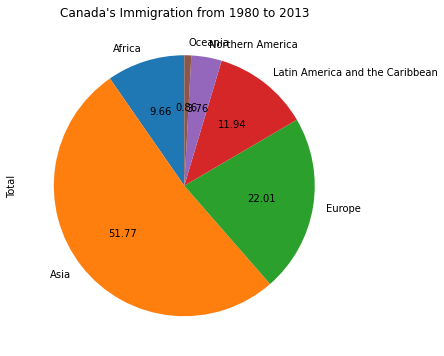

In [7]:
plot = temp_df.plot(x='Continent', y='Total', kind='pie', title='Canada\'s Immigration from 1980 to 2013', autopct='%.2f', 
    labels=temp_df['Continent'], legend=False, startangle=90, figsize=(10,6))

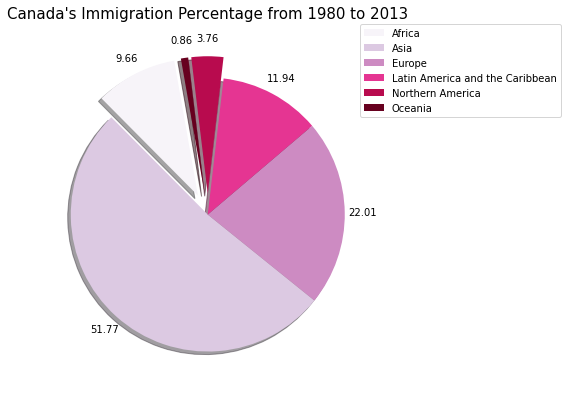

In [8]:
plot = temp_df.plot(x='Continent', y='Total', kind='pie', autopct='%.2f', 
    startangle=100, pctdistance=1.13, figsize=(9,7), colormap='PuRd', explode=[0.14,0,0,0,0.14,0.14], shadow=True, labeldistance=None, 
    radius=0.9, rotatelabels=True, ylabel='')
plt.legend(temp_df.Continent, bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
plt.title('Canada\'s Immigration Percentage from 1980 to 2013', fontsize=15)
plt.show()

## Bubble plot

In [9]:
temp_df = df.drop(columns=['Continent', 'Region', 'Development', 'Total'])

In [10]:
def process_(df, country_name, var_rad, min_rad):
    df = df.T[[country_name]]
    df = df.reset_index()
    df = df.rename(columns={'index':'Year', country_name:'Country_'})
    vals = df['Country_']
    norm_vals = (vals - np.min(vals)) / (np.max(vals) - np.min(vals))
    df['Size'] = norm_vals*var_rad + min_rad
    return df

In [11]:
argentina_df = process_(temp_df, 'Argentina', var_rad=800, min_rad=20)
brazil_df = process_(temp_df, 'Brazil', var_rad=800, min_rad=20)
argentina_df.head()

Country,Year,Country_,Size
0,1980,368,108.831504
1,1981,426,138.786314
2,1982,626,242.078760
3,1983,241,43.240801
4,1984,237,41.174952


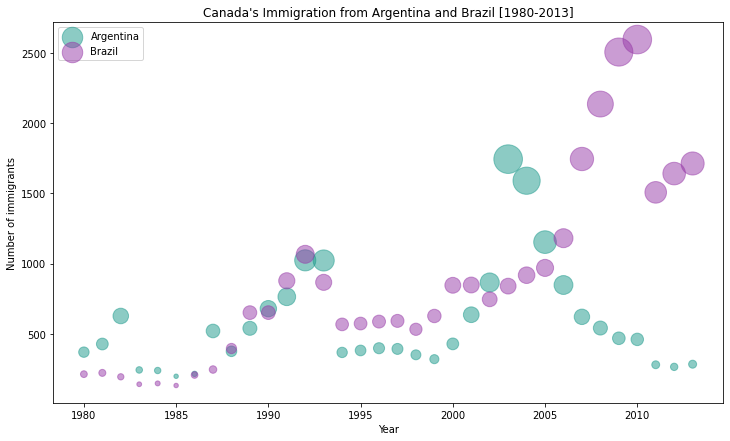

In [12]:
fig = plt.figure(figsize=(12,7))
plt.scatter(argentina_df['Year'], argentina_df['Country_'], s=argentina_df['Size'], alpha=0.5, color='#1b998b')
plt.scatter(brazil_df['Year'], brazil_df['Country_'], s=brazil_df['Size'], alpha=0.5, color='#973aa8')
plt.title('Canada\'s Immigration from Argentina and Brazil [1980-2013]')
plt.legend(['Argentina', 'Brazil'])
plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.show()

In [13]:
df.sort_values(by=['Total'], ascending=False).reset_index()[['Country', 'Total']][:2]

,Country,Total
0,India,691904
1,China,659962


In [14]:
india_df = process_(temp_df, 'India', var_rad=800, min_rad=20)
china_df = process_(temp_df, 'China', var_rad=800, min_rad=20)

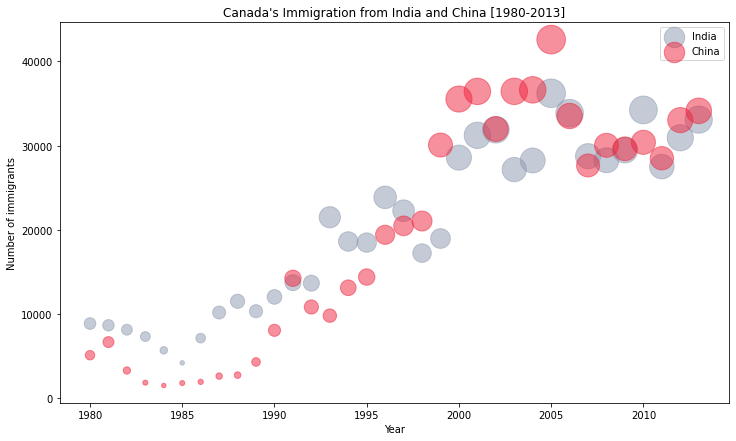

In [15]:
fig = plt.figure(figsize=(12,7))
plt.scatter(india_df['Year'], india_df['Country_'], s=india_df['Size'], alpha=0.5, color='#8d99ae')
plt.scatter(china_df['Year'], china_df['Country_'], s=china_df['Size'], alpha=0.5, color='#ef233c')
plt.title('Canada\'s Immigration from India and China [1980-2013]')
plt.legend(['India', 'China'])
plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.show()

## Histogramas

In [16]:
denmark_df = pd.DataFrame(df.loc['Denmark']).reset_index().iloc[3:-1].rename(columns={'index':'year', 'Denmark':'immigrants'}).astype({'year':'int64', 'immigrants':'int64'})
norway_df = pd.DataFrame(df.loc['Norway']).reset_index().iloc[3:-1].rename(columns={'index':'year', 'Norway':'immigrants'}).astype({'year':'int64', 'immigrants':'int64'})
sweden_df = pd.DataFrame(df.loc['Sweden']).reset_index().iloc[3:-1].rename(columns={'index':'year', 'Sweden':'immigrants'}).astype({'year':'int64', 'immigrants':'int64'})
denmark_df.head()

,year,immigrants
3,1980,272
4,1981,293
5,1982,299
6,1983,106
7,1984,93


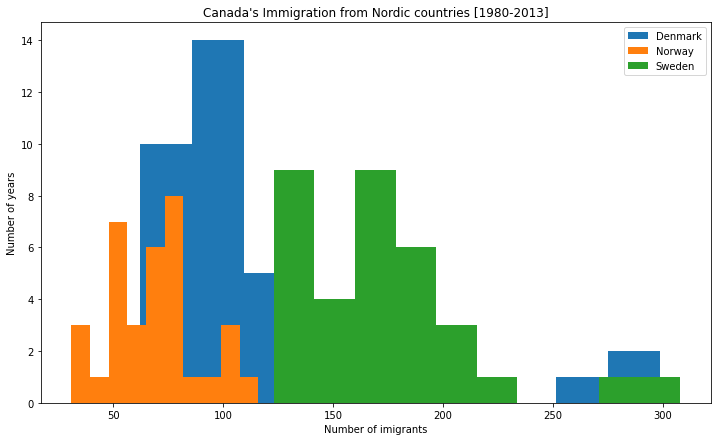

In [17]:
fig = plt.figure(figsize=(12,7))
plt.hist(denmark_df['immigrants'])#, alpha=0.5, color='#8d99ae')
plt.hist(norway_df['immigrants'])#, alpha=0.5, color='#8d99ae')
plt.hist(sweden_df['immigrants'])#, alpha=0.5, color='#8d99ae')
plt.title('Canada\'s Immigration from Nordic countries [1980-2013]')
plt.xlabel('Number of imigrants')
plt.ylabel('Number of years')
plt.legend(['Denmark', 'Norway', 'Sweden'])
plt.show()

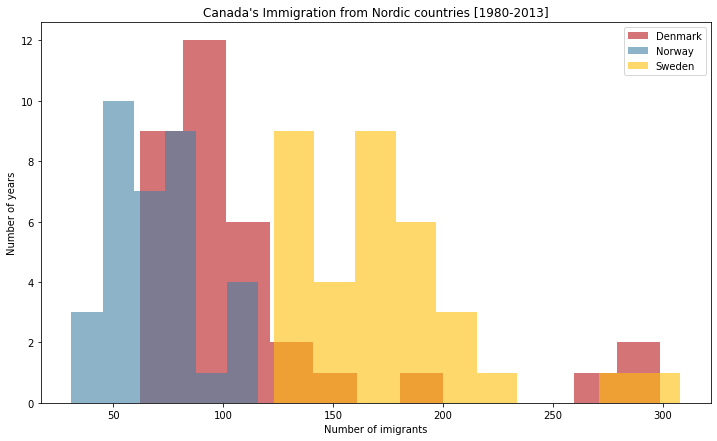

In [18]:
fig = plt.figure(figsize=(12,7))
plt.hist(denmark_df['immigrants'], bins=12, alpha=0.6, color='#ba181b')
plt.hist(norway_df['immigrants'], bins=6, alpha=0.6, color='#4281a4')
plt.hist(sweden_df['immigrants'], bins=10, alpha=0.6, color='#ffbe0b')
plt.title('Canada\'s Immigration from Nordic countries [1980-2013]')
plt.xlabel('Number of imigrants')
plt.ylabel('Number of years')
plt.legend(['Denmark', 'Norway', 'Sweden'])
plt.show()

## Barras Horizontales

In [19]:
# Selección de los 15 países con mayor migración: ordenamiento basado en el parámetro Total
most_df = df.sort_values(by=['Total'], ascending=False).reset_index()[['Country', 'Continent', 'Total']][:16]
most_df = most_df.drop(3) # Quitar el país 'Unknown'
most_df = most_df.sort_values(by='Total')
most_df = most_df.replace(['United Kingdom of Great Britain and Northern Ireland', 'Viet Nam'], ['UK and Northern Ireland', 'Vietnam'])
most_df

,Country,Continent,Total
15,Romania,Europe,93585
14,Vietnam,Asia,97146
13,Jamaica,Latin America and the Caribbean,106431
12,France,Europe,109091
11,Lebanon,Asia,115359
10,Poland,Europe,139241
9,Republic of Korea,Asia,142581
8,Sri Lanka,Asia,148358
7,Iran (Islamic Republic of),Asia,175923
6,United States of America,Northern America,241122


In [20]:
most_df['Continent'].unique()

array(['Europe', 'Asia', 'Latin America and the Caribbean',
       'Northern America'], dtype=object)

In [21]:
def add_labels(x, y, off):
    for idx, v in enumerate(y):
        if off is None:
            plt.text(v + 800, idx, '{:,}'.format(int(v)), c='#7a7a79', fontweight='bold')
            continue
        plt.text(v - off, idx, '{:,}'.format(int(v)), c='#faf9fc', fontweight='bold')

def plot_barh_immigration(df, x, y, color_c, figsize, color_dict, title, x_offset=None, margins=None, legend_pos=None):
    df.plot.barh(
        x, y, figsize=figsize, width=0.75, color=list(df[color_c].map(color_dict))
    )
    add_labels(x=list(df[x]), y=list(df[y]), off=x_offset)
    handles = []
    for key in color_dict.keys():
        patch = mpatches.Patch(color=color_dict[key], label=key)
        handles.append(patch)
    if legend_pos is None:
        plt.legend(handles=handles)
    else:
        plt.legend(handles=handles, loc=legend_pos)
    plt.ylabel(' ')
    plt.xlabel('Number of immigrants')
    plt.title(title, fontsize=15)
    if margins is not None:
        plt.margins(margins[0], margins[1])
    plt.show()

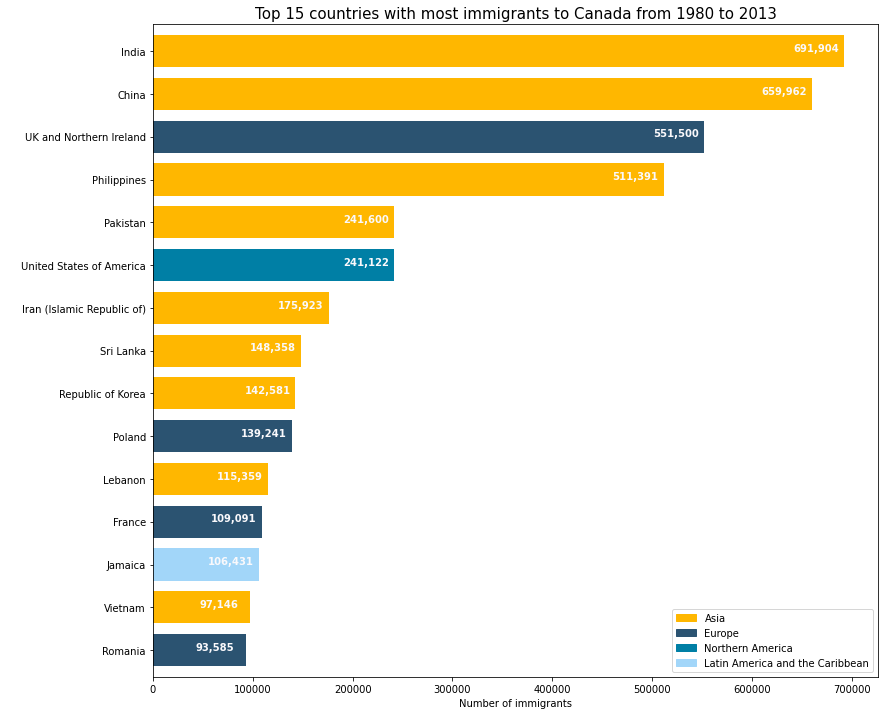

In [22]:
color_dict = {'Asia':'#ffb700', 'Europe':'#2B5371', 'Northern America':'#007fa5', 'Latin America and the Caribbean':'#a2d6f9'}
title = 'Top 15 countries with most immigrants to Canada from 1980 to 2013'
plot_barh_immigration(most_df, x='Country', y='Total', color_c='Continent', figsize=(13,12), color_dict=color_dict, title=title, x_offset=51000)

In [23]:
def build_df_between_years(temp_df, start, end, continents):
    df = temp_df.iloc[start:end].append(continents).T.reset_index()
    df['Total'] = df.iloc[:,  1:-1].agg('sum', axis=1)
    df = df.sort_values(by='Total')
    df = df.replace(['United Kingdom of Great Britain and Northern Ireland', 'Viet Nam'], ['UK and Northern Ireland', 'Vietnam'])
    return df

In [24]:
top_15_countries = list(df.sort_values(by='Total', ascending=False).reset_index()['Country'][:16].drop(3))
temp_df = pd.DataFrame(df.T.drop(['Region', 'Development', 'Total'])[top_15_countries])
continents = temp_df.loc['Continent']
eighties_df = build_df_between_years(temp_df, start=1, end=11, continents=continents)
nineties_df = build_df_between_years(temp_df, start=11, end=21, continents=continents)
thousands_df = build_df_between_years(temp_df, start=21, end=31, continents=continents)

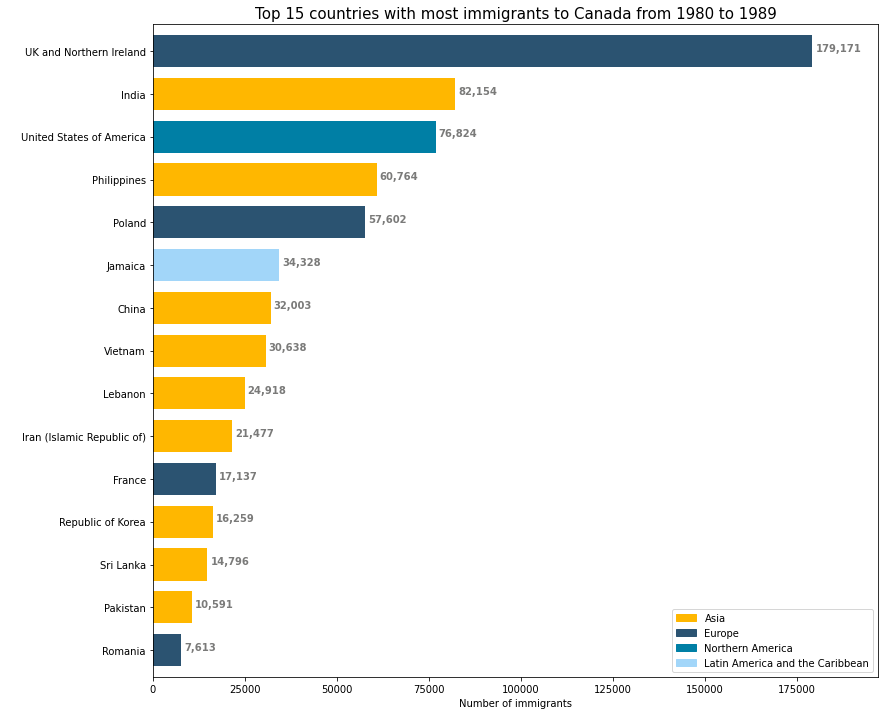

In [25]:
color_dict = {'Asia':'#ffb700', 'Europe':'#2B5371', 'Northern America':'#007fa5', 'Latin America and the Caribbean':'#a2d6f9'}
title = 'Top 15 countries with most immigrants to Canada from 1980 to 1989'
plot_barh_immigration(eighties_df, x='Country', y='Total', color_c='Continent', figsize=(13,12), color_dict=color_dict, title=title, x_offset=None, margins=(0.1, 1),
    legend_pos='lower right')

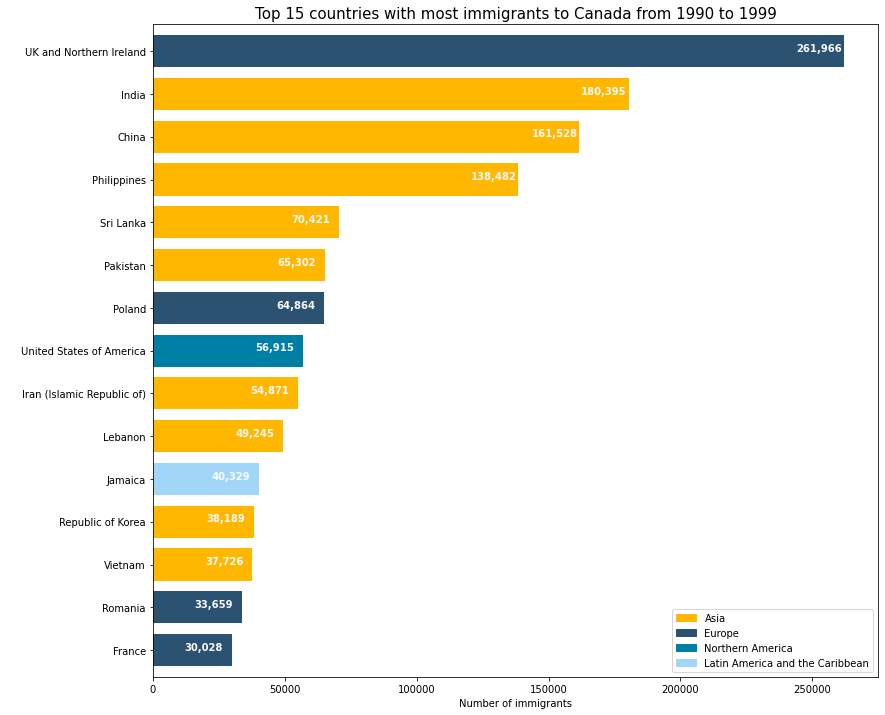

In [26]:
color_dict = {'Asia':'#ffb700', 'Europe':'#2B5371', 'Northern America':'#007fa5', 'Latin America and the Caribbean':'#a2d6f9'}
title = 'Top 15 countries with most immigrants to Canada from 1990 to 1999'
plot_barh_immigration(nineties_df, x='Country', y='Total', color_c='Continent', figsize=(13,12), color_dict=color_dict, title=title, x_offset=18000)

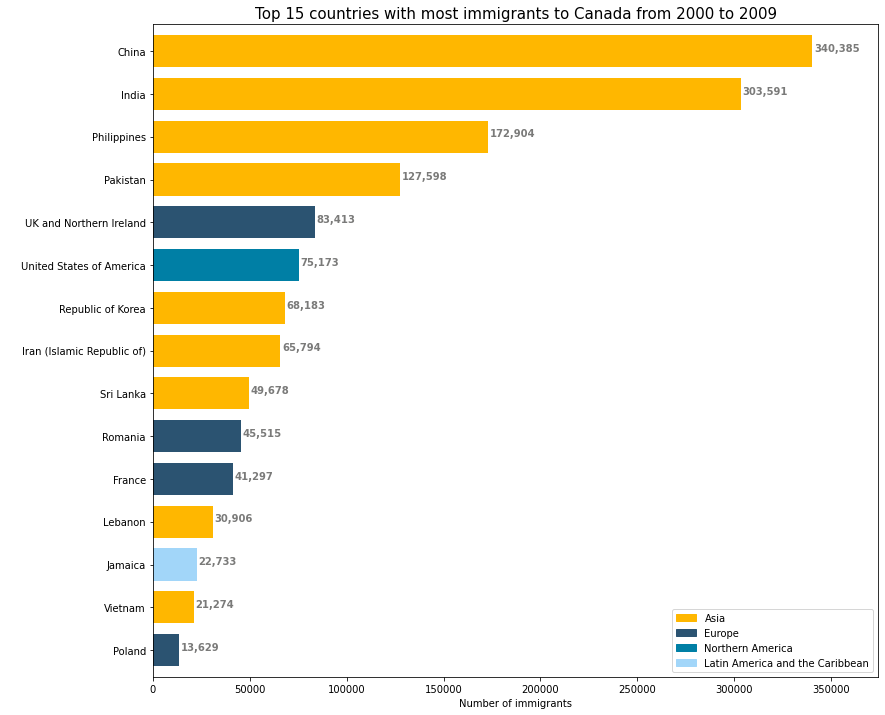

In [27]:
color_dict = {'Asia':'#ffb700', 'Europe':'#2B5371', 'Northern America':'#007fa5', 'Latin America and the Caribbean':'#a2d6f9'}
title = 'Top 15 countries with most immigrants to Canada from 2000 to 2009'
plot_barh_immigration(thousands_df, x='Country', y='Total', color_c='Continent', figsize=(13,12), color_dict=color_dict, title=title, margins=(0.1, 1),
    legend_pos='lower right')